<a href="https://colab.research.google.com/github/LilyHanyiWang/EDA-on-COVID19-Tweets/blob/main/EDA_on_COVID19_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA on COVID19 Tweets

Lily Wang hw2744@uw.edu

Supervised by Professor Christian Darabos.


Dataset:

[COVID19 Tweets](https://www.kaggle.com/datasets/gpreda/covid19-tweets)

References:

[COVID-19: Sentiment Analysis & Social Networks](https://www.kaggle.com/code/andradaolteanu/covid-19-sentiment-analysis-social-networks)

[COVID19. Dynamic in time and space of the tweets](https://www.kaggle.com/code/isaienkov/covid19-dynamic-in-time-and-space-of-the-tweets/)



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from itertools import repeat

import plotly.figure_factory as ff
from collections import Counter
import re
import plotly.express as px
#!pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download(["names","stopwords", "state_union","twitter_samples","movie_reviews",
               "averaged_perceptron_tagger","vader_lexicon","punkt",])

from nltk.sentiment import SentimentIntensityAnalyzer

#!pip install afinn
from afinn import Afinn
afn = Afinn()
 


[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to /root/nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   

# Data preprocessing



## Basic exploration

In [3]:
df= pd.read_csv('/content/drive/MyDrive/EDA analysis/covid19_tweets.csv')
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [4]:
df.shape

(179108, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


In [6]:
df.describe().round(2) 


,user_followers,user_friends,user_favourites
count,179108.00,179108.00,179108.00
mean,109055.53,2121.70,14444.11
std,841467.00,9162.55,44522.70
min,0.00,0.00,0.00
25%,172.00,148.00,206.00
50%,992.00,542.00,1791.00
75%,5284.00,1725.25,9388.00
max,49442559.00,497363.00,2047197.00


## Check for Null & Duplicate Values 


In [7]:
df.is_retweet.value_counts()


False    179108
Name: is_retweet, dtype: int64

All the tweets are not retweeted, i.e. all original tweets which we do not need to exclude.

In [8]:
print(len(df['user_name'].unique()))
print(len(df))

92276
179108


There are totally 179108 tweets from 92276 users in this dataset. 

In [9]:
# check for nan/null 
df.isnull().values.any() 
# count of nulls per column 
df.isnull().sum() 

user_name               0
user_location       36771
user_description    10286
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            51334
source                 77
is_retweet              0
dtype: int64

There is missing data for `user_location`, `user_description`, `hashtags` and `source`.


## Data cleaning


Order the dataset according to tweet time. Delete the time information in the `date` column. Since the dataset only contains time tweets form 2020-07-24 to 2020-08-30, we can also delete the year info.

In [10]:
df = df.sort_values(by=['date'])

df['date'] = df["date"].str.split(" ", n = 1, expand = True)[0]
df['date'] = df["date"].str.split("-", n = 1, expand = True)[1]


Change all the values of `hashtags` and `user_location` in the dataset to lowercases to align the same words and avoid duplication.

In [11]:
df['hashtags']= df['hashtags'].str.lower()
df['user_location'] = df['user_location'].str.lower()
df['text'] = df['text'].str.lower()


Remove 'NaN', special characters and punctuations in `hashtags` and `user_location`.

In [12]:
df['hashtags'].fillna('', inplace=True)
df['hashtags'] = df['hashtags'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
df['hashtags'] = df['hashtags'].apply(lambda x: x.translate(str.maketrans({'_':''})))

df['user_location'].fillna('', inplace=True)
df['user_location'] = df['user_location'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

df['text'] = df['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))


In [13]:
pd.set_option('display.max_rows', 20)
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
17175,Jessica Luther Rummel,denton texas,Mother. Partner. Scholar. Activist. Alchemist....,2020-07-05 03:28:16,234,28,220,False,07-24,protestors needed 6pm10pm daily now 1450 e mck...,,Twitter Web App,False
17174,Dr. Lipi #TrustDrFauci Roy,new york usa,@NBCNews @MSNBC @Forbes Medical Contributor | ...,2009-10-11 18:46:51,12485,4603,38120,True,07-24,always honored to speak w nicolledwallace abou...,covid19,Twitter Web App,False
17173,Patty Hayes,seattle wa,Director of Public Health - Seattle & King Cou...,2017-07-07 18:56:50,718,162,2276,False,07-24,excellent partnership to prevent covid19 thank...,covid19,Twitter for Android,False
17172,Clive Gorman,victoria british columbia,Marketing Director @CNEGames for @idlechampion...,2011-12-23 02:02:35,597,224,23824,False,07-24,dont take your eye off the ball there are stil...,covid19,Twitter for Android,False
17171,Tristyn Russelo,alberta canada,NaN,2017-06-14 22:01:54,5,68,57,False,07-24,apparently at the timberlea saveonfoods store ...,,Twitter Web App,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166660,Dirk Haussecker,rna world,RNA(i) Therapeutics Investor-Scientist who lov...,2011-11-10 12:00:58,9341,339,7276,False,08-30,in germany we have 13 deathsday while daily co...,,Twitter Web App,False
166659,Natalie B 🔶️,england,single mum. Lib Dem. outspoken on Freedom of s...,2019-01-06 14:22:49,439,586,165,False,08-30,i do find it interesting how the tories are br...,tories,Twitter for Android,False
166658,Keith Bishop 👨‍👨‍👧‍👦 🏳️‍🌈,newman university uk,"Foster Dad, Youth Worker & Senior Lecturer (Ch...",2015-06-20 10:56:58,1244,667,1140,False,08-30,concerns have been raised that return to unive...,covid19,Twitter for iPad,False
166657,Kings Place,kings cross london,"An open, multi-arts venue presenting an advent...",2009-02-26 12:16:47,18930,6213,23986,False,08-30,today 1130\ntune in for the latest bach the ...,bach,Twitter Web App,False


Merge `hashtags` with the same meaning. Eg. 'covid19' and 'coronavirus'

Merge `user_location` as far as we can.

In [14]:
us_city_names = ["Aberdeen", "Abilene", "Akron", "Albany", "Albuquerque", "Alexandria", "Allentown", "Amarillo", "Anaheim", "Anchorage", "Ann Arbor", "Antioch", "Apple Valley", "Appleton", "Arlington", "Arvada", "Asheville", "Athens", "Atlanta", "Atlantic City", "Augusta", "Aurora", "Austin", "Bakersfield", "Baltimore", "Barnstable", "Baton Rouge", "Beaumont", "Bel Air", "Bellevue", "Berkeley", "Bethlehem", "Billings", "Birmingham", "Bloomington", "Boise", "Boise City", "Bonita Springs", "Boston", "Boulder", "Bradenton", "Bremerton", "Bridgeport", "Brighton", "Brownsville", "Bryan", "Buffalo", "Burbank", "Burlington", "Cambridge", "Canton", "Cape Coral", "Carrollton", "Cary", "Cathedral City", "Cedar Rapids", "Champaign", "Chandler", "Charleston", "Charlotte", "Chattanooga", "Chesapeake", "Chicago", "Chula Vista", "Cincinnati", "Clarke County", "Clarksville", "Clearwater", "Cleveland", "College Station", "Colorado Springs", "Columbia", "Columbus", "Concord", "Coral Springs", "Corona", "Corpus Christi", "Costa Mesa", "Dallas", "Daly City", "Danbury", "Davenport", "Davidson County", "Dayton", "Daytona Beach", "Deltona", "Denton", "Denver", "Des Moines", "Detroit", "Downey", "Duluth", "Durham", "El Monte", "El Paso", "Elizabeth", "Elk Grove", "Elkhart", "Erie", "Escondido", "Eugene", "Evansville", "Fairfield", "Fargo", "Fayetteville", "Fitchburg", "Flint", "Fontana", "Fort Collins", "Fort Lauderdale", "Fort Smith", "Fort Walton Beach", "Fort Wayne", "Fort Worth", "Frederick", "Fremont", "Fresno", "Fullerton", "Gainesville", "Garden Grove", "Garland", "Gastonia", "Gilbert", "Glendale", "Grand Prairie", "Grand Rapids", "Grayslake", "Green Bay", "GreenBay", "Greensboro", "Greenville", "Gulfport-Biloxi", "Hagerstown", "Hampton", "Harlingen", "Harrisburg", "Hartford", "Havre de Grace", "Hayward", "Hemet", "Henderson", "Hesperia", "Hialeah", "Hickory", "High Point", "Hollywood", "Honolulu", "Houma", "Houston", "Howell", "Huntington", "Huntington Beach", "Huntsville", "Independence", "Indianapolis", "Inglewood", "Irvine", "Irving", "Jackson", "Jacksonville", "Jefferson", "Jersey City", "Johnson City", "Joliet", "Kailua", "Kalamazoo", "Kaneohe", "Kansas City", "Kennewick", "Kenosha", "Killeen", "Kissimmee", "Knoxville", "Lacey", "Lafayette", "Lake Charles", "Lakeland", "Lakewood", "Lancaster", "Lansing", "Laredo", "Las Cruces", "Las Vegas", "Layton", "Leominster", "Lewisville", "Lexington", "Lincoln", "Little Rock", "Long Beach", "Lorain", "Los Angeles", "Louisville", "Lowell", "Lubbock", "Macon", "Madison", "Manchester", "Marina", "Marysville", "McAllen", "McHenry", "Medford", "Melbourne", "Memphis", "Merced", "Mesa", "Mesquite", "Miami", "Milwaukee", "Minneapolis", "Miramar", "Mission Viejo", "Mobile", "Modesto", "Monroe", "Monterey", "Montgomery", "Moreno Valley", "Murfreesboro", "Murrieta", "Muskegon", "Myrtle Beach", "Naperville", "Naples", "Nashua", "Nashville", "New Bedford", "New Haven", "New London", "New Orleans", "New York", "New York City", "Newark", "Newburgh", "Newport News", "Norfolk", "Normal", "Norman", "North Charleston", "North Las Vegas", "North Port", "Norwalk", "Norwich", "Oakland", "Ocala", "Oceanside", "Odessa", "Ogden", "Oklahoma City", "Olathe", "Olympia", "Omaha", "Ontario", "Orange", "Orem", "Orlando", "Overland Park", "Oxnard", "Palm Bay", "Palm Springs", "Palmdale", "Panama City", "Pasadena", "Paterson", "Pembroke Pines", "Pensacola", "Peoria", "Philadelphia", "Phoenix", "Pittsburgh", "Plano", "Pomona", "Pompano Beach", "Port Arthur", "Port Orange", "Port Saint Lucie", "Port St. Lucie", "Portland", "Portsmouth", "Poughkeepsie", "Providence", "Provo", "Pueblo", "Punta Gorda", "Racine", "Raleigh", "Rancho Cucamonga", "Reading", "Redding", "Reno", "Richland", "Richmond", "Richmond County", "Riverside", "Roanoke", "Rochester", "Rockford", "Roseville", "Round Lake Beach", "Sacramento", "Saginaw", "Saint Louis", "Saint Paul", "Saint Petersburg", "Salem", "Salinas", "Salt Lake City", "San Antonio", "San Bernardino", "San Buenaventura", "San Diego", "San Francisco", "San Jose", "Santa Ana", "Santa Barbara", "Santa Clara", "Santa Clarita", "Santa Cruz", "Santa Maria", "Santa Rosa", "Sarasota", "Savannah", "Scottsdale", "Scranton", "Seaside", "Seattle", "Sebastian", "Shreveport", "Simi Valley", "Sioux City", "Sioux Falls", "South Bend", "South Lyon", "Spartanburg", "Spokane", "Springdale", "Springfield", "St. Louis", "St. Paul", "St. Petersburg", "Stamford", "Sterling Heights", "Stockton", "Sunnyvale", "Syracuse", "Tacoma", "Tallahassee", "Tampa", "Temecula", "Tempe", "Thornton", "Thousand Oaks", "Toledo", "Topeka", "Torrance", "Trenton", "Tucson", "Tulsa", "Tuscaloosa", "Tyler", "Utica", "Vallejo", "Vancouver", "Vero Beach", "Victorville", "Virginia Beach", "Visalia", "Waco", "Warren", "Washington", "Waterbury", "Waterloo", "West Covina", "West Valley City", "Westminster", "Wichita", "Wilmington", "Winston", "Winter Haven", "Worcester", "Yakima", "Yonkers", "York", "Youngstown"]
us_city_names = [x.lower() for x in us_city_names]

conditions = [
    # 'india',7
    (df['user_location'].apply(lambda x: 'india' in x)),
    (df['user_location'].apply(lambda x: 'delhi' in x)),
    (df['user_location'].apply(lambda x: 'mumbai' in x)),
    (df['user_location'].apply(lambda x: 'bengaluru' in x)),
    (df['user_location'].apply(lambda x: 'bangalore' in x)),
    (df['user_location'].apply(lambda x: 'bhubaneswar' in x)),
    (df['user_location'].apply(lambda x: 'hyderabad' in x)),
    # 'china',4
    (df['user_location'].apply(lambda x: 'china' in x)),
    (df['user_location'].apply(lambda x: 'beijing' in x)),
    (df['user_location'].apply(lambda x: 'shanghai' in x)),
    (df['user_location'].apply(lambda x: 'hong kong' in x)),
    # 'australia',3
    (df['user_location'].apply(lambda x: 'australia' in x)),
    (df['user_location'].apply(lambda x: 'syndney' in x)),
    (df['user_location'].apply(lambda x: 'melbourne' in x)),
    # 'canada',2
    (df['user_location'].apply(lambda x: 'canada' in x)),
    (df['user_location'].apply(lambda x: 'toronto' in x)),
    # 'uk',4
    (df['user_location'].apply(lambda x: 'england' in x)),
    (df['user_location'].apply(lambda x: 'united kingdom' in x)),
    (df['user_location'].apply(lambda x: 'london' in x)),
    (df['user_location'].apply(lambda x: 'ireland' in x)),
    # 'us',4
    (df['user_location'].apply(lambda x: 'us' in x)),
    (df['user_location'].apply(lambda x: 'united states' in x)),
    (df['user_location'].apply(lambda x: 'usa' in x)),
    (df['user_location'].apply(lambda x: any(i in x.split() for i in us_city_names))),
    # 'no country',4
    (df['user_location'].apply(lambda x: 'worldwide' in x)),
    (df['user_location'].apply(lambda x: 'global' in x)),
    (df['user_location'].apply(lambda x: 'earth' in x)),
    (df['user_location'].apply(lambda x: 'everywhere' in x)),
    # 'philippines'
    (df['user_location'].apply(lambda x: 'philippines' in x)),
    # 'malaysia'
    (df['user_location'].apply(lambda x: 'malaysia' in x)),
    # 'switzerland'
    (df['user_location'].apply(lambda x: 'switzerland' in x)),
    # kenya
    (df['user_location'].apply(lambda x: 'kenya' in x)),
    # nigeria
    (df['user_location'].apply(lambda x: 'nigeria' in x)),
    # 'africa',1
    (df['user_location'].apply(lambda x: 'africa' in x)),
    # 'singapore',1
    (df['user_location'].apply(lambda x: 'singapore' in x))
    ]

values = []
values.extend(repeat('india', 7))
values.extend(repeat('china', 4))
values.extend(repeat('australia', 3))
values.extend(repeat('canada', 2))
values.extend(repeat('uk', 4))
values.extend(repeat('us', 4))
values.extend(repeat('no country', 4))
values.extend(['philippines','malaysia','switzerland','kenya','nigeria','africa','singapore'])


df['country'] = np.select(conditions, values)

In [15]:
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,country
17175,Jessica Luther Rummel,denton texas,Mother. Partner. Scholar. Activist. Alchemist....,2020-07-05 03:28:16,234,28,220,False,07-24,protestors needed 6pm10pm daily now 1450 e mck...,,Twitter Web App,False,us
17174,Dr. Lipi #TrustDrFauci Roy,new york usa,@NBCNews @MSNBC @Forbes Medical Contributor | ...,2009-10-11 18:46:51,12485,4603,38120,True,07-24,always honored to speak w nicolledwallace abou...,covid19,Twitter Web App,False,us
17173,Patty Hayes,seattle wa,Director of Public Health - Seattle & King Cou...,2017-07-07 18:56:50,718,162,2276,False,07-24,excellent partnership to prevent covid19 thank...,covid19,Twitter for Android,False,us
17172,Clive Gorman,victoria british columbia,Marketing Director @CNEGames for @idlechampion...,2011-12-23 02:02:35,597,224,23824,False,07-24,dont take your eye off the ball there are stil...,covid19,Twitter for Android,False,us
17171,Tristyn Russelo,alberta canada,NaN,2017-06-14 22:01:54,5,68,57,False,07-24,apparently at the timberlea saveonfoods store ...,,Twitter Web App,False,canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166660,Dirk Haussecker,rna world,RNA(i) Therapeutics Investor-Scientist who lov...,2011-11-10 12:00:58,9341,339,7276,False,08-30,in germany we have 13 deathsday while daily co...,,Twitter Web App,False,0
166659,Natalie B 🔶️,england,single mum. Lib Dem. outspoken on Freedom of s...,2019-01-06 14:22:49,439,586,165,False,08-30,i do find it interesting how the tories are br...,tories,Twitter for Android,False,uk
166658,Keith Bishop 👨‍👨‍👧‍👦 🏳️‍🌈,newman university uk,"Foster Dad, Youth Worker & Senior Lecturer (Ch...",2015-06-20 10:56:58,1244,667,1140,False,08-30,concerns have been raised that return to unive...,covid19,Twitter for iPad,False,0
166657,Kings Place,kings cross london,"An open, multi-arts venue presenting an advent...",2009-02-26 12:16:47,18930,6213,23986,False,08-30,today 1130\ntune in for the latest bach the ...,bach,Twitter Web App,False,uk


# EDA

## Number of tweets over time

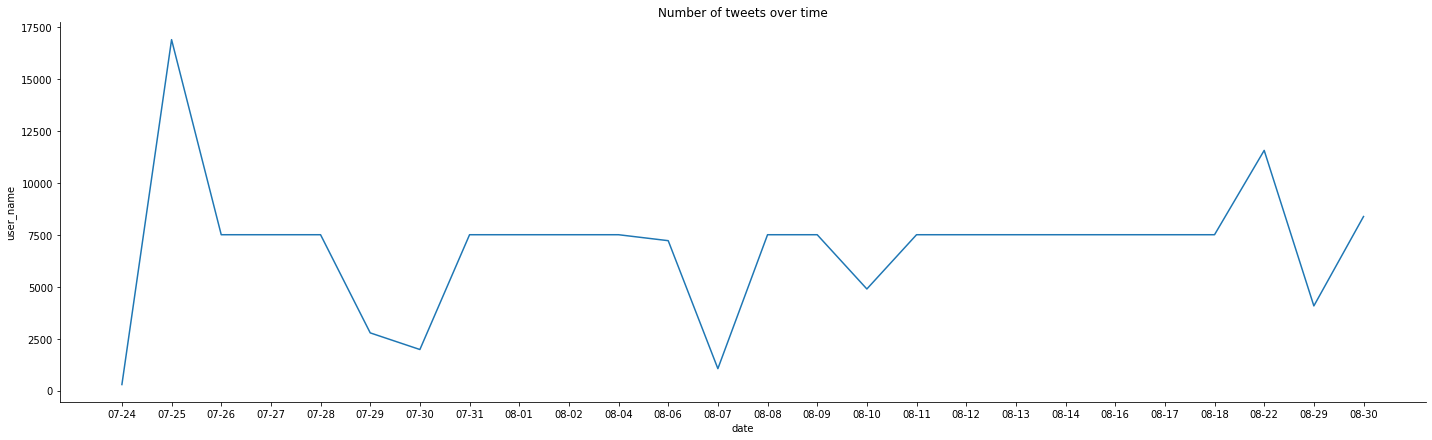

In [16]:
sns.relplot(
    data=df.groupby(['date'])['user_name'].count().reset_index(), kind="line",
    x="date", y="user_name",height=6, aspect=20/6).set(title='Number of tweets over time')


## Trend in hashtags over time



In [17]:
hashtags_time = df.groupby(['date', 'hashtags'])['user_name'].count().reset_index()
hashtags_time.columns = ['day', 'hashtag', 'count']


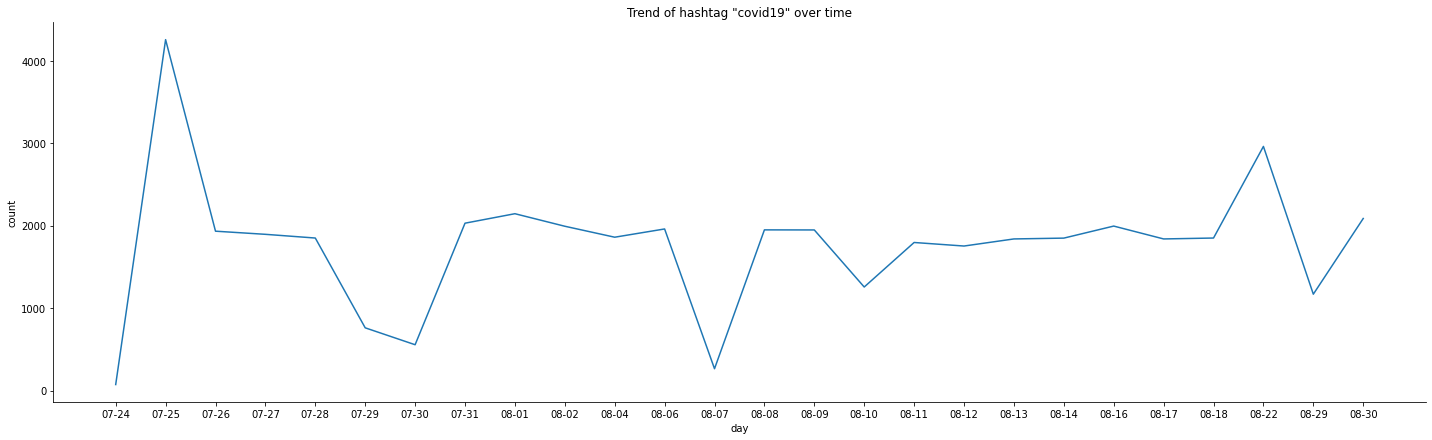

In [18]:
sns.relplot(
    data=hashtags_time[hashtags_time['hashtag']=='covid19'], kind="line",
    x="day", y="count",height=6, aspect=20/6).set(title='Trend of hashtag "' + 'covid19' + '" over time')


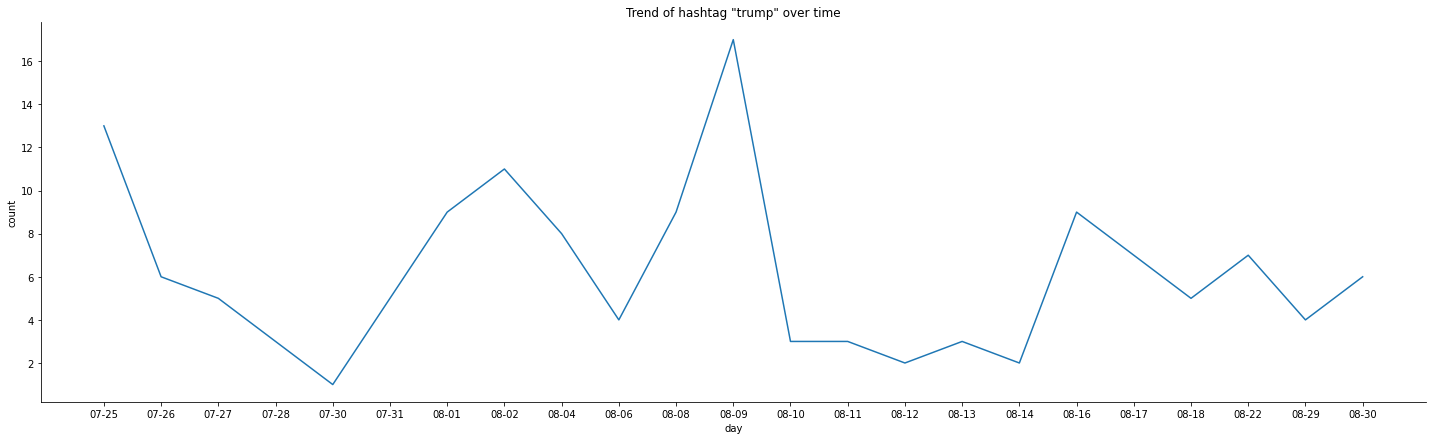

In [19]:
sns.relplot(
    data=hashtags_time[hashtags_time['hashtag']=='trump'], kind="line",
    x="day", y="count",height=6, aspect=20/6).set(title='Trend of hashtag "' + 'trump' + '" over time')


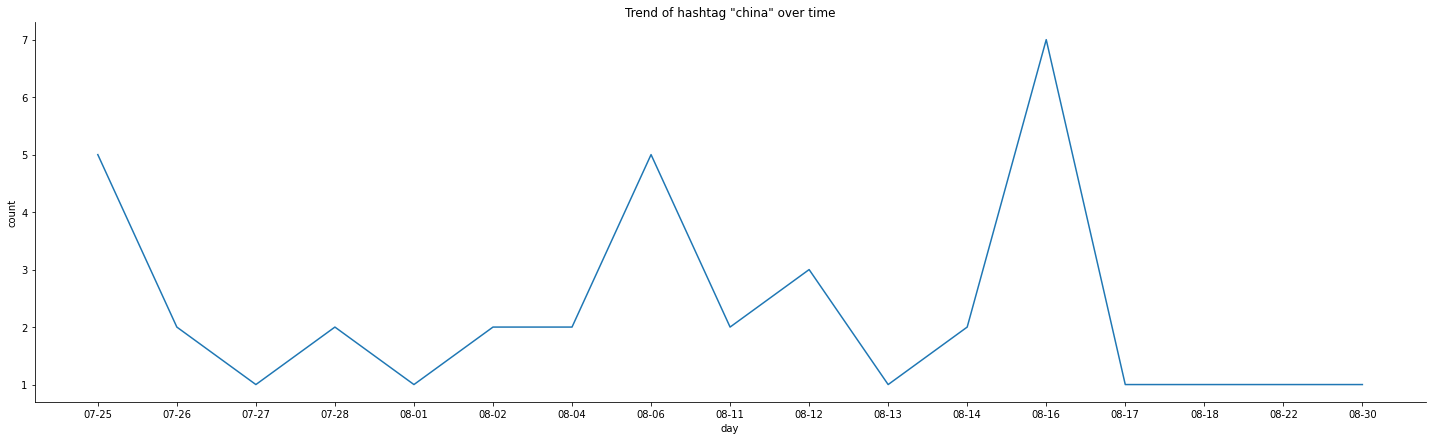

In [20]:
sns.relplot(
    data=hashtags_time[hashtags_time['hashtag']=='china'], kind="line",
    x="day", y="count",height=6, aspect=20/6).set(title='Trend of hashtag "' + 'china' + '" over time')


## top hashtags

In [21]:
hashtags_string = pd.DataFrame(" ".join(df['hashtags']).split())
hashtags_string.columns = ['hashtags']

hashtags = hashtags_string.value_counts(ascending=True).rename_axis('hashtags').reset_index(name='count')
hashtags.tail(15)

,hashtags,count
37607,indiafightscorona,538
37608,china,544
37609,vaccine,703
37610,odisha,707
37611,coronavirusupdate,721
37612,wearamask,800
37613,coronaviruspandemic,882
37614,lockdown,963
37615,trump,1101
37616,corona,1162


Here we display the plot of the top 10 hashtags excluding 'covid19' and 'coronavirus' because there are too many of it.

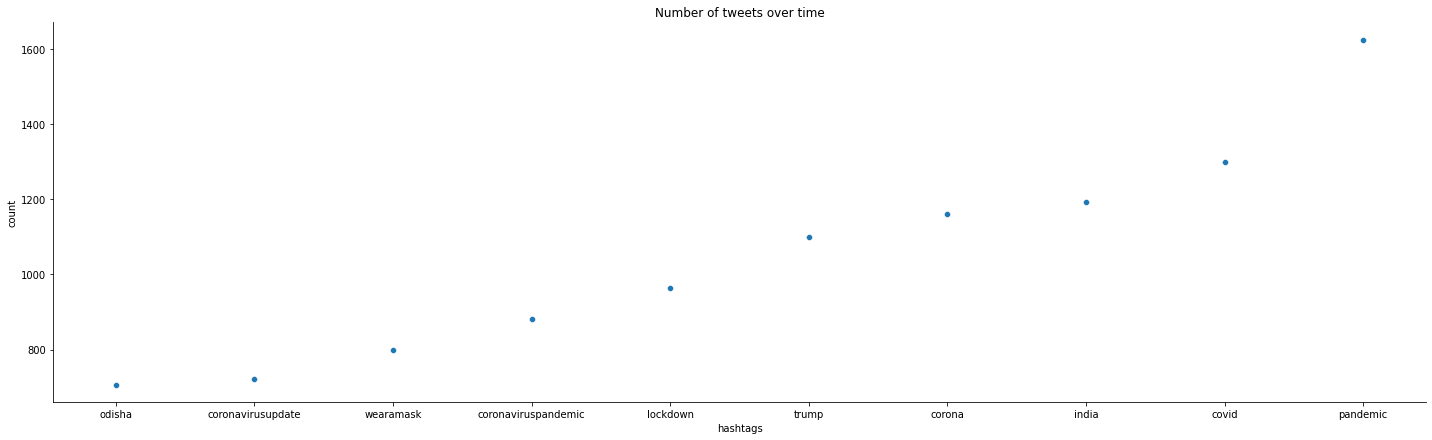

In [22]:
sns.relplot(
    data=hashtags.iloc[-12:-2],
    x="hashtags", y="count",height=6, aspect=20/6).set(title='Number of tweets over time')


## user locations

Below is the 15 most common locations

In [23]:
location = df['user_location'].value_counts(ascending=True).rename_axis('location').reset_index(name='count')
location.tail(15)

,location,count
24571,canada,860
24572,usa,882
24573,new delhi,890
24574,australia,986
24575,new york ny,1087
24576,london,1148
24577,united kingdom,1231
24578,london england,1280
24579,mumbai india,1411
24580,new delhi india,1740


Below is the number of tweets from different countries.


In [24]:
country = df['country'].value_counts(ascending=True).rename_axis('location').reset_index(name='count')
country.tail(15)

,location,count
0,malaysia,381
1,singapore,514
2,switzerland,975
3,philippines,1028
4,kenya,1248
5,china,1385
6,nigeria,2353
7,africa,2790
8,canada,3656
9,australia,3656


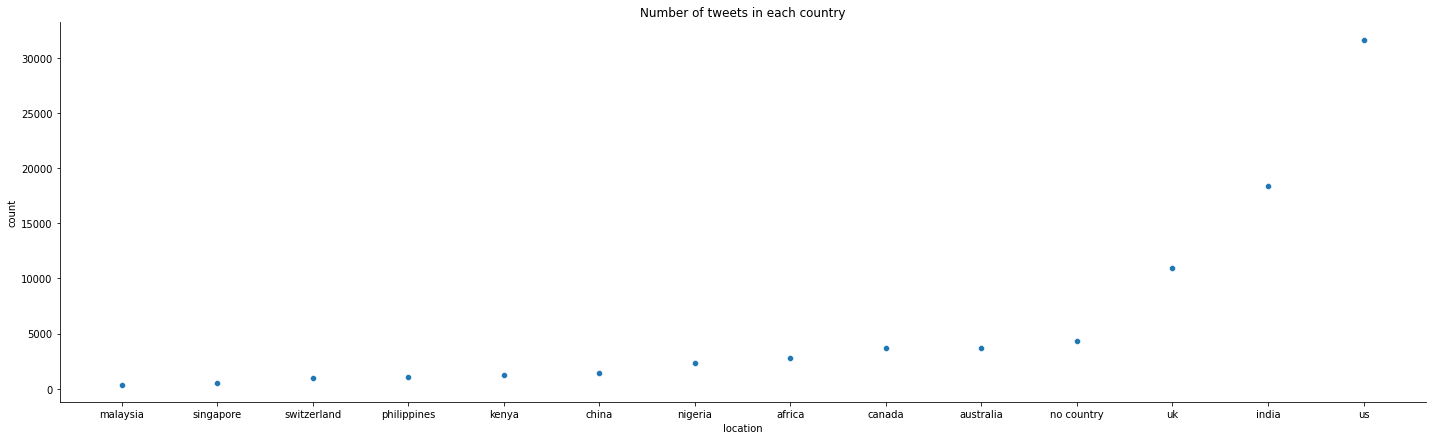

In [25]:
sns.relplot(
    data=country.iloc[0:14],
    x="location", y="count",height=6, aspect=20/6).set(title='Number of tweets in each country')


## Tweets length

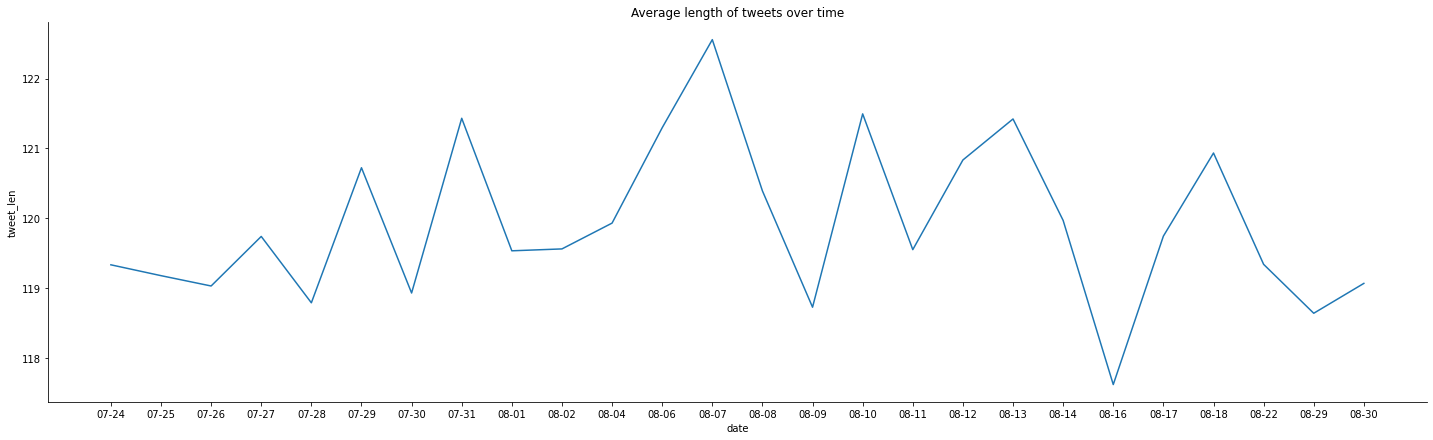

In [26]:
df['tweet_len'] = df['text'].str.len()
sns.relplot(
    data=df.groupby('date')['tweet_len'].mean().reset_index(), kind='line',
    x="date", y="tweet_len",height=6, aspect=20/6).set(title='Average length of tweets over time')


## User influence distributions

Distributions of `user_followers`, `user_favourites`, and `user_friends` idicates the distribution of users' influence.

[Text(0.5, 1.0, 'Number of followers')]

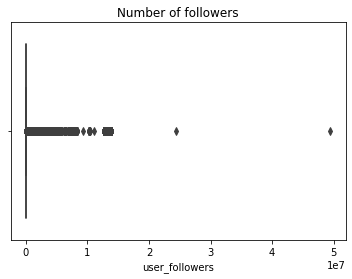

In [27]:
sns.boxplot(x = df['user_followers']).set(title = 'Number of followers')


[Text(0.5, 1.0, 'Number of favourites')]

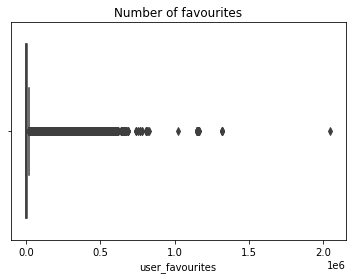

In [28]:
sns.boxplot(x = df['user_favourites']).set(title = 'Number of favourites')


[Text(0.5, 1.0, 'Number of friends')]

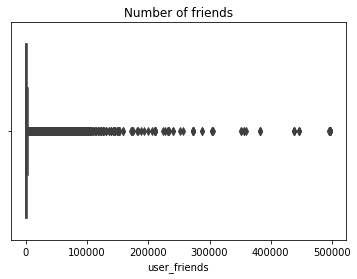

In [29]:
sns.boxplot(x = df['user_friends']).set(title = 'Number of friends')


## Word cloud

In [30]:
def wordcloud(vector,title):
  wordcloud = WordCloud(width = 1000, height = 800,colormap = 'Set3', margin = 0,
                        max_words = 200, min_word_length = 4,
                        stopwords=set(STOPWORDS), 
                        max_font_size = 130, min_font_size = 15,
                        background_color ='black').generate(vector)
  plt.figure(figsize = (10,8))
  plt.axis('off')
  plt.title(title)
  plt.imshow(wordcloud)


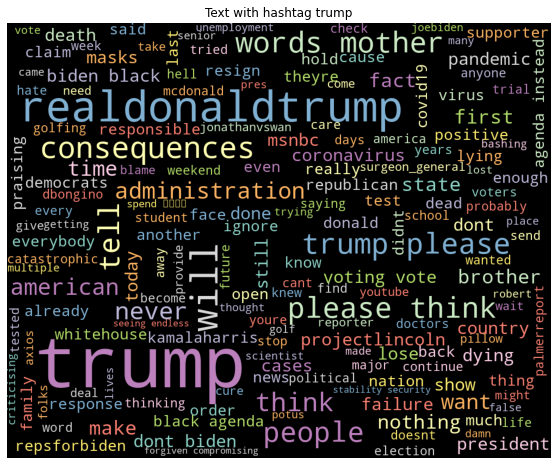

In [31]:
wordcloud(" ".join(df[df['hashtags']=='trump']['text']),title = 'Text with hashtag trump')

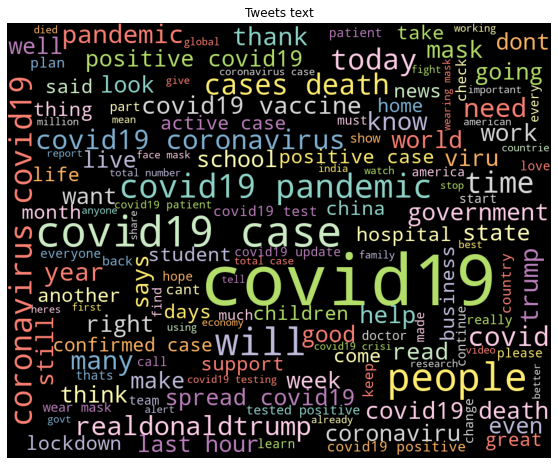

In [32]:
wordcloud(" ".join(df['text']),title = 'Tweets text')


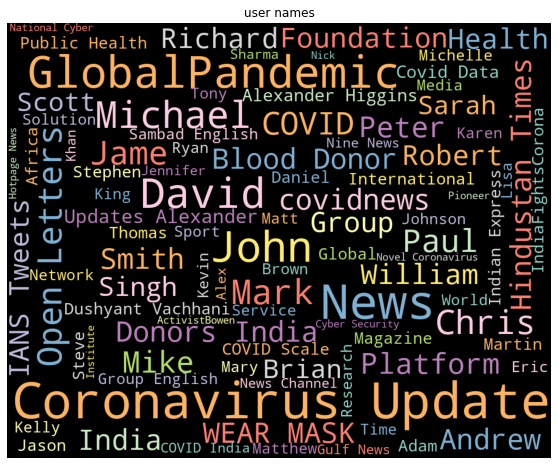

In [33]:
wordcloud(" ".join(df['user_name']),title = 'user names')


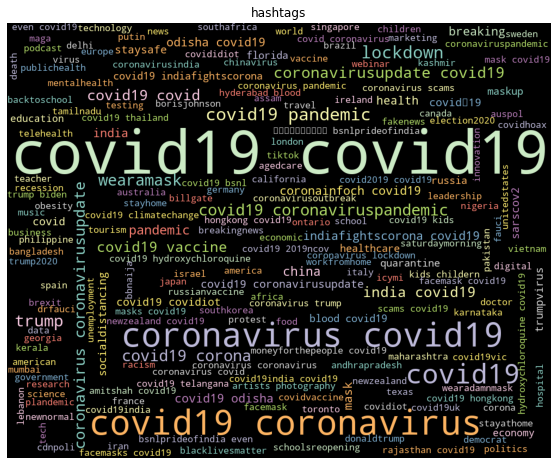

In [34]:
wordcloud(" ".join(hashtags_string['hashtags']),title = 'hashtags')


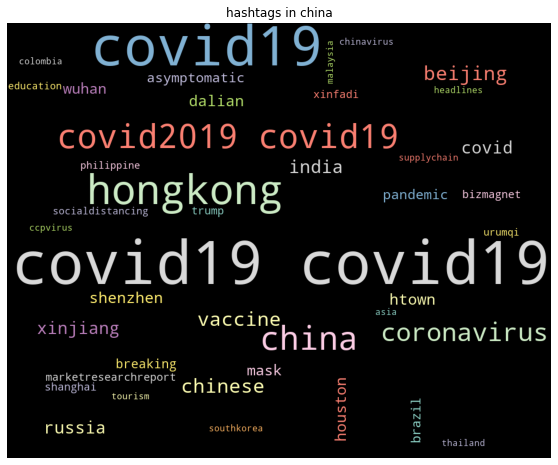

In [35]:
wordcloud(" ".join(df[df['country'] == 'china']['hashtags']),title = 'hashtags in china')


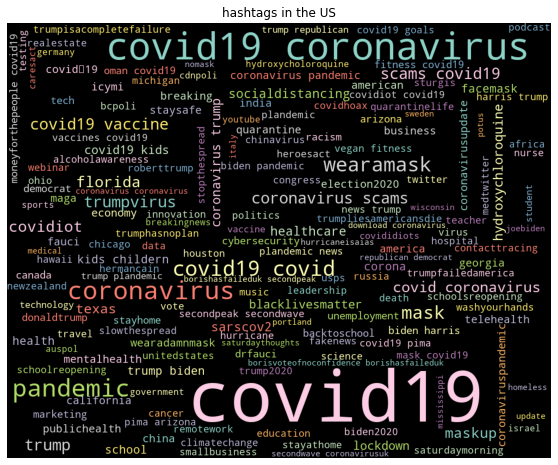

In [36]:
wordcloud(" ".join(df[df['country'] == 'us']['hashtags']),title = 'hashtags in the US')


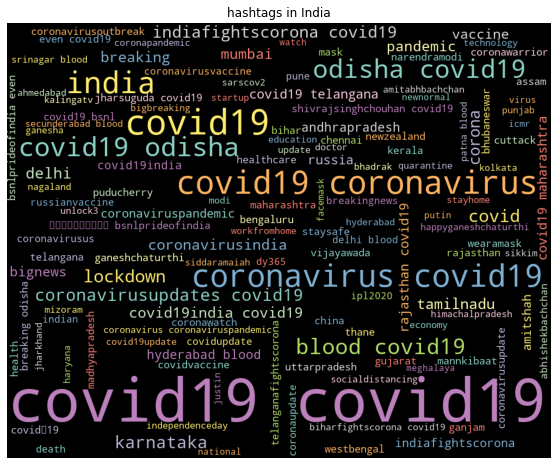

In [37]:
wordcloud(" ".join(df[df['country'] == 'india']['hashtags']),title = 'hashtags in India')


In [38]:
pd.DataFrame(" ".join(df['text']).split()).value_counts(ascending=True).rename_axis('word').reset_index(name='count')

,word,count
0,httpstcolqgaoqtqxk,1
1,httpstcorrovuyul0e,1
2,httpstcorrof7scxu7,1
3,httpstcorrodijfjud,1
4,httpstcorrobuiwmjk,1
...,...,...
329584,in,54640
329585,of,59906
329586,to,75037
329587,the,105930


# Sentiment analysis


## VADER
Sentiment analysis based on NLTK's built-in, pretrained sentiment analyzer, VADER (Valence Aware Dictionary and sEntiment Reasoner).


In [40]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores(df['text'][1])

{'neg': 0.062, 'neu': 0.837, 'pos': 0.101, 'compound': 0.2263}

In [41]:
def is_positive(tweet: str) -> bool:
    """True if tweet has positive compound sentiment, False otherwise."""
    return sia.polarity_scores(tweet)["compound"] > 0


In [42]:
df['positive'] = df['text'].apply(lambda x: is_positive(x))

[Text(0.5, 1.0, 'overall sentiment')]

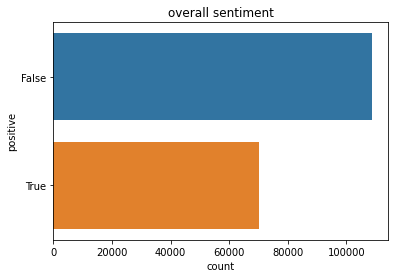

In [43]:
sns.countplot(data=df, y = 'positive').set(title = 'overall sentiment')

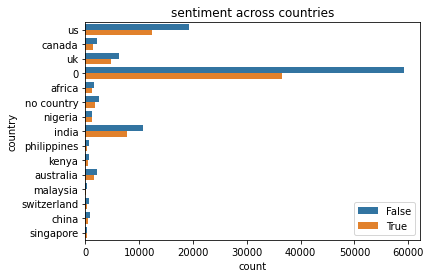

In [44]:
sns.countplot(data=df, y="country", hue="positive").set(title = 'sentiment across countries')
plt.legend(loc='lower right')
plt.show ()

## Afinn

Using the Afinn lexicons developed by Finn Årup Nielsen. It contains 3300+ words with a polarity score associated with each word.

Exclude stop words

In [75]:
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(" ".join(df['text']))
  
filtered_sentence = [w for w in word_tokens if not w in stop_words]
  
filtered_sentence = []
  
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)


In [80]:
len(" ".join(df['text']).split())

3107779

In [78]:
len(filtered_sentence)

2085554

In [84]:
# df['scores'] = df['text'].apply(lambda x:Afinn().score(x))
scores = map(lambda x:Afinn().score(x),filtered_sentence)

In [85]:
text = pd.DataFrame()
text['text'] = " ".join(df['text']).split() 

In [ ]:
text['score'] = list(scores)

The sentiment is positive if score > 0, negative if score < 0, and neutral if score = 0.

We can cluster all the words in the text to positive and negative words and create a positive-negative wordcloud accordingly.

In [ ]:
text

In [ ]:
wordcloud(text[text['score']>0]['text'],title = 'Positive')

In [ ]:
wordcloud(text[text['score']<0]['text'],title = 'Negative')

In [ ]:
wordcloud(text[text['score']=0]['text'],title = 'Neutral')